# ASTR 412 - Week 3:  "Data Querying and Visualization"

Today we'll learn how to interface with the SDSS database, and retrieve and visualize data.

# I. Visualizing Data

#### The standard Python library for plotting and visualization is called "Matplotlib".  Below are a few examples showing what it can do.  An excellent tutorial can be found here: https://www.labri.fr/perso/nrougier/teaching/matplotlib/


In [28]:
# import matplotlib and some of its modules

import matplotlib
%config InlineBackend.rc = {}
from matplotlib import pylab as plt
%matplotlib inline

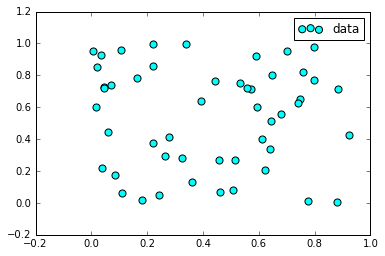

In [54]:
"""
Simple demo of a scatter plot.
http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
"""
import numpy as np
#import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x,y, s = 50,c='cyan', label = 'data')
plt.legend()
plt.show()

75
75


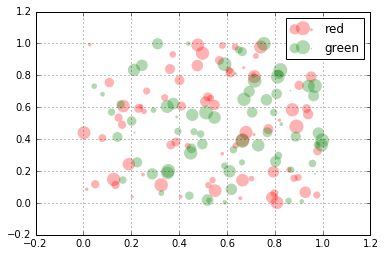

In [66]:
"""
Simple demo of a scatter plot.
http://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html
"""

import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()
for color in ['red', 'green']:
    n = 75
    x, y, z = rand(3,n)
    #x = rand(n)
    #y = rand(n)
    print (len(x))
    scale = 200.0 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

Sample size: 1000
Mean: 0.00
Median: -0.03


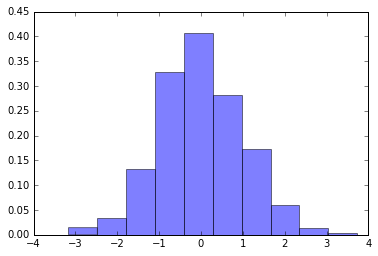

In [76]:
"""
Simple demo of a histogram.
http://matplotlib.org/examples/frontpage/plot_histogram.html
"""


# Let's make a random Gaussian distribution, centered on 0, with a standard deviation of 1
mu = 0
sigma = 1.
samplesize = 1000
s = np.random.normal(mu,sigma, samplesize)

print ("Sample size: %i" % samplesize)
print ("Mean: %.2f" % np.mean(s))
print ("Median: %.2f" % np.median(s))

## make a histogram of the data
#count, bins, ignored = plt.hist(s, 30, normed=True, alpha = 0.5)
## overlay a Gaussian model, using the mean and standard deviation (sigma)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
## display the data
#plt.show()

plt.hist(s, bins=10, color='blue', normed='True', alpha=0.5)
plt.show()

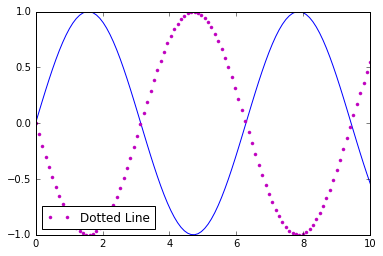

In [89]:
"""
Demo of a simple plot with a custom dashed line.

"""
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 10, 100)  # makes an array of 100 evenly spaced points between 0 and 10

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-', linewidth=10, label='Dashed Line')
ax.plot(x, -1 * np.sin(x), '.', color='m', linewidth=0.2, label='Dotted Line')

ax.legend(loc='lower left')
plt.show()

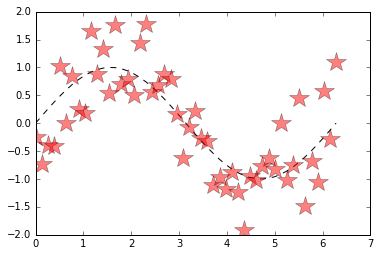

In [97]:
"""
Plot simulated data and a model curve

"""


# let's start by making some data to plot:
x = np.linspace(0, 2*np.pi, 50)  # here we are making an array of length 50, ranging from 0-2pi
y = np.sin(x) # we will set up another array, which is the sin() of the array X

# here we will make another array just like 'Y', but with random scatter
y2 = y + 0.5 * np.random.normal(size=x.shape) 

# here we'll set up the plotting area
fig, ax = plt.subplots()

# here we'll plot x vs y
# formatting information:  'k' = black; '--' = dashed
ax.plot(x, y, 'k--')

# and we'll plot x vs. y2
# formatting information: 'r' = red; 'o' = circles
ax.plot(x, y2, 'r*', markersize=20, alpha=0.5)

"""
# If you want to, you can play around with the formats and labels of the ticks and axes
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$', '2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
"""

plt.show()

#### EXPERIMENT: Try chaning the formatting of the points and lines on the plot.  You can find more examples here: http://matplotlib.org/users/screenshots.html

# II. Importing SciServer and other important libraries
The SciServer team has written a number of libraries, generally prefixed with "SciServer", that assist in various functions. As with all Python libraries, they must be actively imported before being used.
The next code block imports those, together with some standard Python libraries helpful for scientific analysis. The code block below applies some settings you may find helpful.

In [1]:
# Step 2a: Import Python libraries to work with SciServer

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
import skimage.io                   # image processing library
import urllib                       # package for reading/manipulating URLs
import json                         # Work with Javascript object notation (.json) files

In [2]:
# Step 2b: Apply some special settings to the imported libraries
# ensures columns get written completely in notebook

pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')

If you don't receive any errors after running the blocks of code above, you can try playing around with the libraries.  Shown below are a few examples of figures that can be made using Matplotlib.  This [thumbnail gallery](http://matplotlib.org/1.2.1/gallery.html) is useful for finding example code for making just about any kind of plot or visualization you can think of. If you're a fan of [XKCD](http://xkcd.com/), you can also XKCD-ify your plots with the code found [here](http://matplotlib.org/xkcd/gallery.html) :)

# III. Querying an astronomy database (SDSS DR12)
The next code block searches the SDSS Data Release 12 database via the CasJobs REST API. The query completes quickly, so it uses CasJobs quick mode.
CasJobs also has an asynchronous mode, which will submit job to a queue and will store the results in a table in your MyDB. If your results are very large, it will store the results in MyScratchDB instead.
Run the code block below to query DR12. Try changing some of the query parameters in step 3a to see the effect on the results returned in step 3d.
Documentation on the SciServer Python libraries can be found at our documentation site at:
http://scitest02.pha.jhu.edu/python-docs/
make example with batch query mode.

An extensive tutorial on how to query the SDSS database can be found here:
http://cas.sdss.org/dr5/en/help/howto/search/default.asp

In [3]:
# Step 3a: Find objects in the Sloan Digital Sky Survey's Data Release 12.
#
# Query the Sloan Digital Sky Serveys' Data Release 12.
# For the database schema and documentation see http://skyserver.sdss.org
#
# This query finds "a 4x4 grid of nice-looking galaxies": 
#   galaxies in the SDSS database that have a spectrum 
#   and have a size (petror90_r) larger than 10 arcsec.
# 
# First, store the query in an object called "query"
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.u, p.g
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17
  AND p.petror90_r > 10
"""

In [4]:
# Step 3b: Send the query to CasJobs.
#
# WHAT PARAMETERS DOES CasJobs.executeQuery take?
# This example uses DR12 as context - the code makes a connection 
#   to the DR12 database, then runs the query in quick mode.
#   When the query succeeds, an "OK" message prints below.
queryResponse = CasJobs.executeQuery(query, "dr12")

In [5]:

# Step 3c: store results in a format for easy analysis.
#
# Results have been returned as a CSV table called "queryResponse".
# Now parse the results into a DataFrame object using 
#    the pandas library.
#    pandas.read_csv documentation: 
#      http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
#    INSERT LINK to documentation on how to use pandas.read_csv.
gals = pandas.read_csv(queryResponse, index_col='objId')

In [6]:
# Step 3d: Show the table of results
gals

,ra,dec,petror90_r,u,g
objId,,,,,
1237645941824356443,40.285690,-0.714957,14.72862,17.55033,15.75007
1237645943978393694,55.123625,0.872487,18.85110,18.28252,16.52093
1237645943979114622,56.847420,0.875488,15.66479,17.85144,15.88613
1237645943979311221,57.248385,0.925979,14.60275,18.35856,16.24755
1237646588246688297,80.135126,1.186679,11.14294,18.71668,16.93691
1237648672921485632,243.708876,-0.915653,15.01578,17.62068,15.69075
1237648672922337955,245.700633,-0.844301,10.51866,18.03035,16.36745
1237648672922468973,246.015172,-0.902869,10.80825,17.75224,16.30215
1237648673459077169,245.367353,-0.457074,11.18379,18.11665,16.31566


# Exercise A: Querying CasJobs
Below is everything you've seen so far, in one code block.

Try changing the query in the following ways: 
- Return 8 matching objects insetad of 16.
- Select only nearby galaxies (redshift < 0.05).
- Select only galaxies likely to be spirals (with u-r color >= 2.22)
- Search for galaxies in SDSS Data Release 10 instead of DR12.
What changes do you notice in the table of returned results?

Some helpful resources:
- SciServer Python modules documentation: http://scitest02.pha.jhu.edu/python-docs/
- Schema of SDSS Data Release 12: http://skyserver.sdss.org/dr12/en/help/browser/browser.aspx
- Schema of SDSS Data Release 10: http://skyserver.sdss.org/dr10/en/help/browser/browser.aspx

In [7]:
# Here is everything so far, from beginning to end.
# import your token
##import SciServer.Keystone as Keystone  # import user management library to print username
##with open('/home/idies/keystone.token', 'r') as f:
##    token = f.read().rstrip('\n')
# import packages
import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
import skimage.io                   # image processing library
import urllib                       # package for reading/manipulating URLs
import json                         # Work with Javascript object notation (.json) files
pandas.set_option('display.max_colwidth', -1)
import warnings
warnings.filterwarnings('ignore')
# enter query
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17
  AND p.petror90_r > 10
"""
# send query to CasJobs
##queryResponse = CasJobs.executeQuery(query, "dr12",token=token)
queryResponse = CasJobs.executeQuery(query, "dr12")
# store results
gals = pandas.read_csv(queryResponse)
# show results
gals

,objId,ra,dec,petror90_r
0,1237645941824356443,40.285690,-0.714957,14.72862
1,1237645943978393694,55.123625,0.872487,18.85110
2,1237645943979114622,56.847420,0.875488,15.66479
3,1237645943979311221,57.248385,0.925979,14.60275
4,1237646588246688297,80.135126,1.186679,11.14294
5,1237648672921485632,243.708876,-0.915653,15.01578
6,1237648672922337955,245.700633,-0.844301,10.51866
7,1237648672922468973,246.015172,-0.902869,10.80825
8,1237648673459077169,245.367353,-0.457074,11.18379
9,1237648673459667002,246.695626,-0.510111,10.27149


# IV. Visualizing Returned Data
Now that we have run the query and stored the results, we can start analyzing the results.

Start by making a simple plot of positions, using the default query from step 3 (select top 16... AND p.petror90_r > 10).

What do you see?

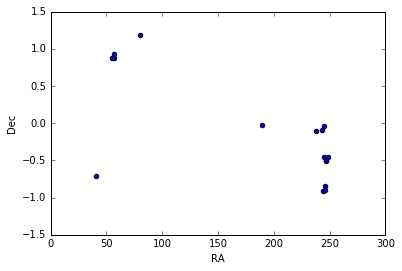

In [8]:
# Try making an Ra, Dec scatter plot...

plt.scatter(gals['ra'], gals['dec'])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show() 


# Exercise B: Plotting more data
Here is everything you've seen so far, including the plots, in one code block.

Try changing the code block below in the following ways. What changes do you notice in the plots?
- Plot the first 100 matching objects instead of the first 16.
- Plot galaxies out to dec = +/-5 (change the display axes as well)
- Plot a histogram of the g-band magnitudes
- Plot a color-magnitude diagram with g on the x-axis and g-r on the y-axis.

Some helpful resources:
- SciServer Python modules documentation: http://scitest02.pha.jhu.edu/python-docs/
- Schema of SDSS Data Release 12: http://skyserver.sdss.org/dr12/en/help/browser/browser.aspx
- Documentation for matplotlib module: http://matplotlib.org/contents.html

                  objId          ra        dec  petror90_r
0   1237648702977343535  208.226922 -1.114612   72.89983  
1   1237648702979375194  212.907457 -1.156153   68.60960  
2   1237648703519326351  219.958345 -0.718152   109.64070 
3   1237648704054296626  215.599060 -0.387647   87.73666  
4   1237648704056328322  220.234833 -0.318190   51.96191  
5   1237648704581664772  193.802725  0.116658   54.81316  
6   1237648720673177684  132.727357 -0.589097   88.46999  
7   1237648720698146893  189.828074 -0.531947   67.21996  
8   1237648721765793820  175.836307  0.222223   78.10703  
9   1237648721771167815  188.116440  0.390631   102.67700 
10  1237648722840846413  178.903953  1.237182   59.48714  
11  1237649918971216048  27.874670   13.131715  51.01587  
12  1237649919509594232  31.372023   13.250993  51.82471  
13  1237649920580124714  23.993957   14.671540  69.68130  
14  1237649961387163705  63.228622  -6.347193   59.73608  
15  1237650369413972039  193.274188 -3.507215   65.70464

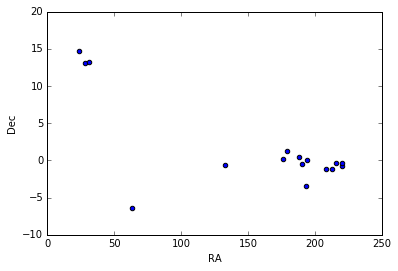

In [9]:
# Here is everything so far, from beginning to end.
# import your token
#import SciServer.Keystone as Keystone  # import user management library to print username
#with open('/home/idies/keystone.token', 'r') as f:
#    token = f.read().rstrip('\n')
# import packages
import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
import skimage.io                   # image processing library
import urllib                       # package for reading/manipulating URLs
import json                         # Work with Javascript object notation (.json) files
pandas.set_option('display.max_colwidth', -1)
import warnings
warnings.filterwarnings('ignore')
# enter query
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17
  AND p.petror90_r > 50
"""
# send query to CasJobs
##queryResponse = CasJobs.executeQuery(query, "dr12",token=token)
queryResponse = CasJobs.executeQuery(query, "dr12")
# store results
gals = pandas.read_csv(queryResponse)
print (gals)
# make scatterplot
plt.scatter(gals['ra'], gals['dec'])
plt.xlabel('RA')
plt.ylabel('Dec')
#plt.axis((200,300, -2,2))
plt.show() 

# V. Storing Results in your container for later use
The next code block saves the data table "gals" as an HD5 file and as a CSV file.

To see these files, go back to your iPython notebook dashboard (the page from which you opened this notebook). Make sure you are in the persistent folder. You should see your files there. Click on the file names to preview.


In [10]:
# store result as HDF5 file 
h5store = pandas.HDFStore('GalaxyThumbSample.h5')
h5store['galaxies']=gals
h5store.close()

# store result as CSV file
gals.to_csv('GalaxyThumbSample.csv')

print ("Done.")

Done.



# Exercise C: Saving files
Using the code block below (a copy of the one above), try the following:

- Change the name of the file
- Save the file as tab-separated variable (.tsv) instead of the default comma-separated variable (.csv).

Documentation on the Pandas package's DataFrame.to_csv method:
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

In [11]:
# store result as HDF5 file 
h5store = pandas.HDFStore('GalaxyThumbSample.h5')
h5store['galaxies']=gals
h5store.close()

# store result as CSV file
gals.to_csv('GalaxyThumbSample.csv')

print ("Done.")

Done.



# VI. Retrieve thumbnail cutouts of galaxies and show them on screen
SkyServer has a service that will produce a color image cutout of certain dimensions around a specified position, displayed as a JPG thumbnail.

The service creates the thumbnail using a pre-defined image pyramid. For a single image, you can construct the URL of the service using your query results, then use the skimage package to call the URL. To get all thumbnails in your query result, you can iterate using a loop.

The code block below gives an example of how to retrieve JPG thumbnails of galaxies in DR12. Take a look at each line in the for loop. What does each line do? How would you modify it to display results differently?

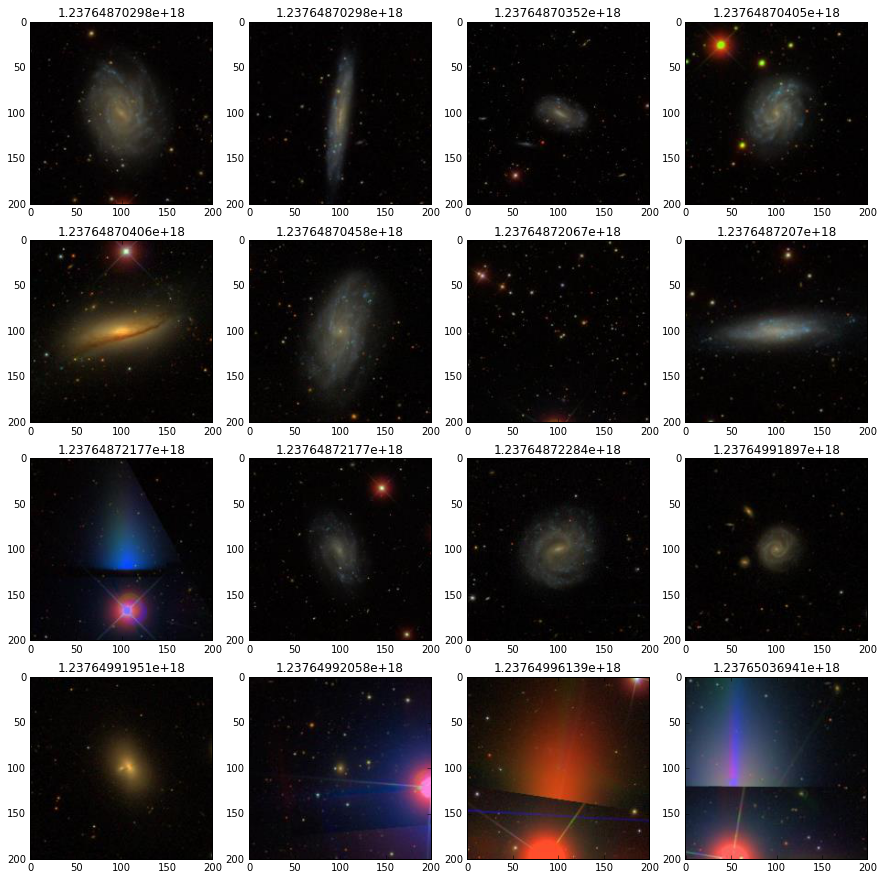

In [12]:

width=200
height=200
pixelsize=0.396
plt.figure(figsize=(15, 15))
subPlotNum = 1

for index,gal in gals.iterrows():
    scale=2*gal['petror90_r']/pixelsize/width
    url="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra="+str(gal['ra'])
    url+="&dec="+str(gal['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url+="&height="+str(height)
    img=skimage.io.imread(url)
    plt.subplot(4,4,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)
    # show the object identifier (objId) above the image.
    plt.title(gal['objId'])

# VII. Write thumbnails to SciDrive
SciDrive is the newest component of SciServer. It allows you to save query results as flat files in a Dropbox-like interface you can access anywhere.

For boring technical reasons, the version of SciDrive this notebook connects to is not the same as the pre-production version you may have used before. Use the link below to access this test version of SciDrive. You should have no containers in this SciDrive yet.

Check your test SciDrive at:
https://www.scidrive.org/scidrive/

If the above link does not show a proper view of scidrive, with folders etc., please let us know, and do not run the rest of the code in this notebook until we investigate.

The three code blocks below work together to write the thumbnails you generated in step 6 into your test SciDrive.

In [25]:
# Step 7a: generate a public URL to be used by SciDrive
# TODO should ba part of the SciServer.SciDrive library
def scidrivePublicURL(path):
    req = urllib.request.Request(url=SciServer.Config.SciDriveHost+'/vospace-2.0/1/media/sandbox/'+path,method='GET') 
    req.add_header('X-Auth-Token', token) 
    req.add_header('Content-Type','application/xml') 
    res=urllib.request.urlopen(req)
    jsonResponse = json.loads(res.read().decode())
    return jsonResponse['url']

In [26]:
# Step 7b: create a container in your SciDrive to hold the thumbnail images
container = 'thumbnail_test'
# IMPORTANT: Only run next if the container does not yet exist. If you have already created 
#   the container, comment out the next line.
#SciServer.SciDrive.createContainer(container,token=token)
SciServer.SciDrive.createContainer(container)

In [27]:
# Step 7c: Write thumbnails to SciDrive. You will see a confirmation message below
#   for each thumbnail.
width=200
height=200
pixelsize=0.396

puburls=[]
for index,gal in gals.iterrows():
    scale=2*gal['petror90_r']/pixelsize/width
    url="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra="+str(gal['ra'])
    url+="&dec="+str(gal['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url+="&height="+str(height)
    req = urllib.request.Request(url=url,method='GET')
    res = urllib.request.urlopen(req)
    data=res.read()
    scidrivename_name = container+"/new_"+str(index)+".jpg"
# Here the file gets uploaded to the container
    #SciServer.SciDrive.upload(scidrivename_name, data,token=token)
    SciServer.SciDrive.upload(scidrivename_name, data)
    puburls.append(scidrivePublicURL(scidrivename_name))
gals['pubURL']=puburls

# print the URL of the first thumbnail as a final confirmation message.
print("URL of first thumbnail: "+puburls[0])

{"size":"3.9 KB","rev":1,"thumb_exists":false,"bytes":4034,"modified":"Thu, 02 Feb 2017 12:57:32 -0500","path":"/thumbnail_test/new_0.jpg","is_dir":false,"icon":"file","root":"dropbox","mime_type":"application/file"}


NameError: name 'token' is not defined

## Let's make a color-magnitude diagram of galaxies

In [133]:
# Here is everything so far, from beginning to end.
# import your token
##import SciServer.Keystone as Keystone  # import user management library to print username
##with open('/home/idies/keystone.token', 'r') as f:
##    token = f.read().rstrip('\n')
# import packages
import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
import skimage.io                   # image processing library
import urllib                       # package for reading/manipulating URLs
import json                         # Work with Javascript object notation (.json) files
pandas.set_option('display.max_colwidth', -1)
import warnings
warnings.filterwarnings('ignore')
# enter query
query="""
SELECT TOP 1000 p.objId,p.ra,p.dec,p.petror90_r, p.u,p.g,p.r,p.i,p.z
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17
  AND p.petror90_r > 10
"""
# send query to CasJobs
##queryResponse = CasJobs.executeQuery(query, "dr12",token=token)
queryResponse = CasJobs.executeQuery(query, "dr12")
# store results
gals = pandas.read_csv(queryResponse)
# show results
gals

,objId,ra,dec,petror90_r,u,g,r,i,z
0,1237648672921485632,243.708876,-0.915653,15.01578,17.62068,15.69075,14.76769,14.31505,13.95473
1,1237648672922337955,245.700633,-0.844301,10.51866,18.03035,16.36745,15.51038,15.04473,14.68656
2,1237648672922468973,246.015172,-0.902869,10.80825,17.75224,16.30215,15.53570,15.09664,14.79790
3,1237648673459077169,245.367353,-0.457074,11.18379,18.11665,16.31566,15.37856,14.90568,14.53339
4,1237648673459667002,246.695626,-0.510111,10.27149,18.00297,16.80840,16.32209,16.03524,15.92436
5,1237648673459667234,246.782081,-0.492432,11.98310,17.60779,15.90711,15.02164,14.54730,14.19581
6,1237648673460585255,248.894520,-0.452329,11.48170,18.73143,16.83358,15.94758,15.53410,15.15245
7,1237648673971437623,189.522249,-0.027031,21.94494,16.32763,14.72128,13.88051,13.46587,13.15041
8,1237648673992671592,237.945144,-0.105170,13.36310,17.97395,15.81621,14.82292,14.36214,13.89869
9,1237648673994965546,243.236782,-0.096251,26.27760,16.66752,14.76988,13.87948,13.42091,13.14239


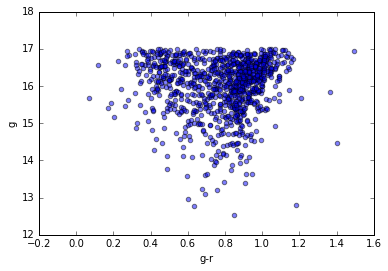

In [135]:
# make scatterplot
gal_color = gals['g']-gals['r']
gal_mag = gals['g']
plt.scatter(gal_color, gal_mag, alpha=0.5)
plt.xlabel('g-r')
plt.ylabel('g')
#plt.axis((200,300, -2,2))
plt.show() 